In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import matplotlib.pyplot as plt

In [0]:
class LinearRegressionData(object):
  def __init__(self):
    pass
  def load_data(self):
    x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

    y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
    
    return x_train, y_train
  

In [0]:
class TorchModel:
  def __init__(self):
    pass
  def modelBuild(self):
    # Hyper-parameters
    input_size = 1
    output_size = 1
    
    learning_rate = 0.001

    # Linear regression model
    model = torch.nn.Linear(input_size, output_size)

    # Loss and optimizer
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 
    return model,criterion, optimizer
  
  def Train_model(self,x_train,y_train,model,criterion,optimizer):
    num_epochs = 60
    # Train the model
    for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
    
      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if((epoch+1) % 5 == 0):
         print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
          
          
 
    # Plot the graph
    predicted = model(torch.from_numpy(x_train)).detach().numpy()
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, predicted, label='Fitted line')
    plt.legend()
    plt.show()
    
    
    
    
       
          
      

In [0]:
def main():
  lobj=LinearRegressionData()
  x_train, y_train=lobj.load_data()
  #print(x_train)
  tobj=TorchModel()
  model,criterion, optimizer=tobj.modelBuild()
  tobj.Train_model(x_train,y_train,model,criterion,optimizer)
  
  
  
  
  

Epoch [5/60], Loss: 3.0305
Epoch [10/60], Loss: 1.3908
Epoch [15/60], Loss: 0.7263
Epoch [20/60], Loss: 0.4570
Epoch [25/60], Loss: 0.3477
Epoch [30/60], Loss: 0.3033
Epoch [35/60], Loss: 0.2852
Epoch [40/60], Loss: 0.2776
Epoch [45/60], Loss: 0.2744
Epoch [50/60], Loss: 0.2730
Epoch [55/60], Loss: 0.2722
Epoch [60/60], Loss: 0.2718


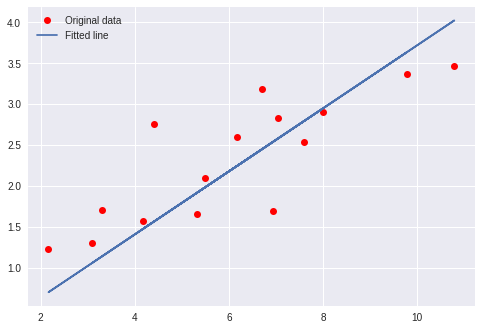

In [0]:
main()